Get current DAX constituents from the web

In [39]:
#Pseudocode
#Wrap it as function without any arguments
#1.try: tests if the response is correct
#2. try if table extists in the website
#3. try if table has the column names

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import yfinance as yf

In [2]:
wikiurl = 'https://en.wikipedia.org/wiki/DAX' # try if the the connection exists
response = requests.get(wikiurl)
print(response.status_code)

200


In [3]:
soup = BeautifulSoup(response.text, 'html.parser')
indiatable=soup.find('table',{'id':'constituents' ,'class':"wikitable"}) #try if

In [5]:
print(indiatable)

<table cellpadding="2" cellspacing="2" class="wikitable sortable" id="constituents" style="text-align: center; font-size: 100%;">
<tbody><tr>
<th>Logo</th>
<th>Company</th>
<th><a href="/wiki/Prime_Standard" title="Prime Standard">Prime Standard</a> Sector</th>
<th>Ticker</th>
<th>Index weighting (%)<sup class="reference plainlinks nourlexpansion" id="ref_1"><a href="#endnote_1">1</a></sup></th>
<th>Employees</th>
<th>Founded
</th></tr>
<tr>
<td><a class="image" href="/wiki/File:Adidas-group-logo-fr.svg"><img alt="Adidas-group-logo-fr.svg" data-file-height="232" data-file-width="1000" decoding="async" height="19" src="//upload.wikimedia.org/wikipedia/commons/thumb/1/1c/Adidas-group-logo-fr.svg/80px-Adidas-group-logo-fr.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/1/1c/Adidas-group-logo-fr.svg/120px-Adidas-group-logo-fr.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/1/1c/Adidas-group-logo-fr.svg/160px-Adidas-group-logo-fr.svg.png 2x" width="80"/></a></td

In [6]:
df = pd.read_html(str(indiatable))

In [7]:
print(df)

[    Logo                Company   Prime Standard Sector   Ticker  \
0    NaN                 Adidas                 Textile   ADS.DE   
1    NaN                 Airbus               Aerospace   AIR.DE   
2    NaN                Allianz      Financial Services   ALV.DE   
3    NaN                   BASF         Basic Materials   BAS.DE   
4    NaN                  Bayer              Healthcare  BAYN.DE   
5    NaN             Beiersdorf          Consumer goods   BEI.DE   
6    NaN                    BMW              Automobile   BMW.DE   
7    NaN               Brenntag            Distribution   BNR.DE   
8    NaN            Commerzbank      Financial Services   CBK.DE   
9    NaN            Continental              Automotive   CON.DE   
10   NaN               Covestro         Basic Materials  1COV.DE   
11   NaN          Daimler Truck              Automobile   DTG.DE   
12   NaN          Deutsche Bank      Financial Services   DBK.DE   
13   NaN         Deutsche Börse      Financial 

In [8]:
constituents = pd.DataFrame(df[0])[['Ticker', 'Company', 'Prime Standard Sector']]
constituents = constituents.rename(columns = {'Prime Standard Sector': 'Sector', 'Company': 'Name'})

In [9]:
display(constituents)

,Ticker,Name,Sector
0,ADS.DE,Adidas,Textile
1,AIR.DE,Airbus,Aerospace
2,ALV.DE,Allianz,Financial Services
3,BAS.DE,BASF,Basic Materials
4,BAYN.DE,Bayer,Healthcare
5,BEI.DE,Beiersdorf,Consumer goods
6,BMW.DE,BMW,Automobile
7,BNR.DE,Brenntag,Distribution
8,CBK.DE,Commerzbank,Financial Services
9,CON.DE,Continental,Automotive


Simple visualization how many companies in each sector there are

<AxesSubplot:xlabel='Sector'>

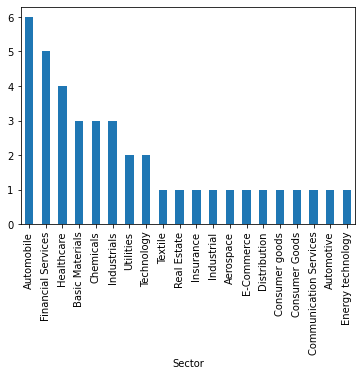

In [46]:
constituents.groupby(['Sector'])['Sector'].count().sort_values(ascending=False).plot.bar()

In [47]:
#Create a function that is case the sector occurs less than 2 then change it into 'Other'

In [52]:
#A list of tickers from contituents
dax_tickers = constituents['Ticker'].values.tolist()

In [53]:
dax_tickers

['ADS.DE',
 'AIR.DE',
 'ALV.DE',
 'BAS.DE',
 'BAYN.DE',
 'BEI.DE',
 'BMW.DE',
 'BNR.DE',
 'CBK.DE',
 'CON.DE',
 '1COV.DE',
 'DTG.DE',
 'DBK.DE',
 'DB1.DE',
 'DPW.DE',
 'DTE.DE',
 'EOAN.DE',
 'FRE.DE',
 'HNR1.DE',
 'HEI.DE',
 'HEN3.DE',
 'IFX.DE',
 'MBG.DE',
 'MRK.DE',
 'MTX.DE',
 'MUV2.DE',
 'P911.DE',
 'PAH3.DE',
 'QIA.DE',
 'RHM.DE',
 'RWE.DE',
 'SAP.DE',
 'SRT3.DE',
 'SIE.DE',
 'ENR.DE',
 'SHL.DE',
 'SY1.DE',
 'VOW3.DE',
 'VNA.DE',
 'ZAL.DE']

Download monthly data from yahoo API

In [68]:
dax_tickers_sample = ['1COV.DE', 'BMW.DE']

In [69]:
data_sample = yf.download(dax_tickers_sample, start = "2000-01-01", interval='1mo')['Adj Close']

[*********************100%***********************]  2 of 2 completed


In [71]:
print(dax_tickers_sample)

['1COV.DE', 'BMW.DE']


In [117]:
df_dax_sample = list()
ticker_str = list()
for tick in dax_tickers_sample:
    data = yf.download(tick, start = "2000-01-01",group_by="Ticker", interval='1mo')['Adj Close']
    df_dax_sample.append(data)
    ticker_str.append(tick)
data = pd.concat(df_dax_sample, axis = 1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [119]:
data.columns = ticker_str
data.reset_index()

,Date,1COV.DE,BMW.DE
0,2000-01-01,NaN,12.122417
1,2000-02-01,NaN,13.694221
2,2000-03-01,NaN,17.027885
3,2000-04-01,NaN,15.204389
4,2000-05-01,NaN,16.745367
...,...,...,...
275,2022-12-01,36.549999,83.379997
276,2023-01-01,42.119999,93.230003
277,2023-02-01,41.650002,97.750000
278,2023-03-01,38.130001,100.940002


In [116]:
#Function to retrieve data:
#Input list of tickers
#check it they are strings and is a list
#Checks if ticker can be downloaded (is in yahoo finance)
#appends list with data
#appends list with ticker name
#retrieves data with 1s time postponment
#if some stocks have nulls -> delete them
#returns a dataframe
#creates logs what tickers have been downloaded
#at least two time series should be to do mvp

,Date,1COV.DE,BMW.DE
0,2000-01-01,NaN,12.122416
1,2000-02-01,NaN,13.694219
2,2000-03-01,NaN,17.027884
3,2000-04-01,NaN,15.204389
4,2000-05-01,NaN,16.745371
...,...,...,...
275,2022-12-01,36.549999,83.379997
276,2023-01-01,42.119999,93.230003
277,2023-02-01,41.650002,97.750000
278,2023-03-01,38.130001,100.940002


,Adj Close,Adj Close
Date,,
2000-01-01,NaN,12.122418
2000-02-01,NaN,13.694222
2000-03-01,NaN,17.027885
2000-04-01,NaN,15.204383
2000-05-01,NaN,16.745367
...,...,...
2022-12-01,36.549999,83.379997
2023-01-01,42.119999,93.230003
2023-02-01,41.650002,97.750000


[*********************100%***********************]  1 of 1 completed


In [99]:
data

Date
2015-11-01    25.030468
2015-12-01    24.237793
2016-01-01    21.906610
2016-02-01    21.258060
2016-03-01    23.751377
                ...    
2022-12-01    36.549999
2023-01-01    42.119999
2023-02-01    41.650002
2023-03-01    38.130001
2023-04-01    37.709999
Name: Adj Close, Length: 90, dtype: float64